
<h1 style="text-align:center">Neural Network Assignment</h1>




<h4 style="text-align: right;">By Aryan Gupta</h4>

In [142]:
# importing packages

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("runs/mnist_SGD")# device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyperparameters
input_size = 28*28 #784
hidden_size = 250
num_of_classes = 10
num_epochs = 5
batch_size = 100
learning_rate =0.001

In [143]:
import pandas as pd
df = pd.read_csv("./train.csv")

In [144]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [145]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [146]:
df.dropna()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# Distorted MNIST Dataset
# train data loader
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class DistortedMNIST(Dataset):
  def __init__(self):
    # data loading
    #xy = np.loadtxt("Clean_train_mnist.csv", delimiter=",", dtype = np.float32, skiprows=1)
    xy = df.to_numpy()
    self.x = torch.from_numpy(xy[:,1:].astype(np.float32)).view(-1, 1, 28,28)
    self.y = torch.from_numpy(xy[:,0]) # n_samples,1
    self.num_of_samples = xy.shape[0]

  def __getitem__(self, index):
    # dataset[0]
    return self.x[index], self.y[index]
  def __len__(self):
    # len(dataset) 
    return self.num_of_samples

train_datasets = DistortedMNIST()

# test dataset formulation class
class DistortedMNIST_test(Dataset):
  # implement init with self
  def __init__(self):
    # data loading
    x = np.loadtxt("/content/test.csv", delimiter=",", dtype = np.float32, skiprows=1)
    self.x = torch.from_numpy(x).view(-1, 1, 28,28)
    self.num_of_samples = x.shape[0]
  def __len__(self):
    # len(dataset) 
    return self.num_of_samples



In [148]:
train_datasets = DistortedMNIST()
#test_datasets = DistortedMNIST_test()

In [149]:
print(train_datasets.__len__())

42000


In [150]:
train_loader = torch.utils.data.DataLoader(dataset=train_datasets, batch_size=batch_size, shuffle=True)
#test_loader = torch.utils.data.DataLoader(dataset=test_datasets, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


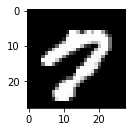

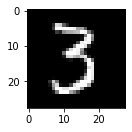

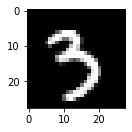

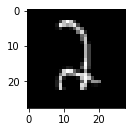

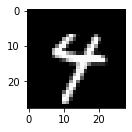

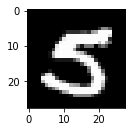

In [151]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap="gray")
  plt.show()
image_grid = torchvision.utils.make_grid(samples)
writer.add_image('mnist_images', image_grid)
writer.close()

# Defining the neural network

In [152]:
# defining the neural network
class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNetwork, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

## With SGD:

#### Training (Loss and Accuracy)

In [153]:
model_SGD = NeuralNetwork(input_size, hidden_size, num_of_classes)
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_SGD.parameters(), lr = learning_rate)

# for tensorboard
samples = samples.reshape(-1, 28*28).to(device)
writer.add_graph(model_SGD, samples)

# training loops
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.long().to(device)

    # forward
    output = model_SGD(images)
    loss = criterion(output, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%64 == 0:
      with torch.no_grad():
        n_correct = 0
        n_samples = 0
        images = images.reshape(-1, 28*28).to(device)
        output= model_SGD(images)
        a, predictions = torch.max(output,1)
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item()
        train_accuracy = 100.0 *(n_correct/ n_samples)
        print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps},Training accuracy on a sample: {train_accuracy}, loss = {loss.item():.4f}")
        writer.add_scalar('training loss', loss.item(), epoch*n_total_steps + i)
        writer.add_scalar('training accuracy', train_accuracy, epoch*n_total_steps + i)

epoch 1/5, step 64/420,Training accuracy on a sample: 94.0, loss = 0.7944
epoch 1/5, step 128/420,Training accuracy on a sample: 98.0, loss = 0.2563
epoch 1/5, step 192/420,Training accuracy on a sample: 95.0, loss = 0.2968
epoch 1/5, step 256/420,Training accuracy on a sample: 95.0, loss = 0.2941
epoch 1/5, step 320/420,Training accuracy on a sample: 93.0, loss = 0.4512
epoch 1/5, step 384/420,Training accuracy on a sample: 92.0, loss = 0.6557
epoch 2/5, step 64/420,Training accuracy on a sample: 95.0, loss = 0.2792
epoch 2/5, step 128/420,Training accuracy on a sample: 97.0, loss = 0.1716
epoch 2/5, step 192/420,Training accuracy on a sample: 98.0, loss = 0.1162
epoch 2/5, step 256/420,Training accuracy on a sample: 97.0, loss = 0.3267
epoch 2/5, step 320/420,Training accuracy on a sample: 96.0, loss = 0.2258
epoch 2/5, step 384/420,Training accuracy on a sample: 97.0, loss = 0.1622
epoch 3/5, step 64/420,Training accuracy on a sample: 96.0, loss = 0.2636
epoch 3/5, step 128/420,Trai

#### Testing accuracy :

In [154]:
# testing accuracy on the sample
for epoch in range(num_epochs):
  for i,(images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.long().to(device)
    output = model_SGD(images)
    if (i+1)%64 == 0:
      with torch.no_grad():
        n_correct = 0
        n_samples = 0
        images = images.reshape(-1, 28*28).to(device)
        output= model_SGD(images)
        a, predictions = torch.max(output,1)
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item()
        test_accuracy = 100.0 *(n_correct/ n_samples)
        print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps},Testing accuracy on a sample: {test_accuracy}")
        writer.add_scalar('testing accuracy', test_accuracy, epoch*n_total_steps + i)

epoch 1/5, step 64/420,Testing accuracy on a sample: 95.0
epoch 1/5, step 128/420,Testing accuracy on a sample: 99.0
epoch 1/5, step 192/420,Testing accuracy on a sample: 100.0
epoch 1/5, step 256/420,Testing accuracy on a sample: 97.0
epoch 1/5, step 320/420,Testing accuracy on a sample: 95.0
epoch 1/5, step 384/420,Testing accuracy on a sample: 99.0
epoch 2/5, step 64/420,Testing accuracy on a sample: 98.0
epoch 2/5, step 128/420,Testing accuracy on a sample: 98.0
epoch 2/5, step 192/420,Testing accuracy on a sample: 99.0
epoch 2/5, step 256/420,Testing accuracy on a sample: 97.0
epoch 2/5, step 320/420,Testing accuracy on a sample: 98.0
epoch 2/5, step 384/420,Testing accuracy on a sample: 97.0
epoch 3/5, step 64/420,Testing accuracy on a sample: 99.0
epoch 3/5, step 128/420,Testing accuracy on a sample: 98.0
epoch 3/5, step 192/420,Testing accuracy on a sample: 100.0
epoch 3/5, step 256/420,Testing accuracy on a sample: 99.0
epoch 3/5, step 320/420,Testing accuracy on a sample: 99.

In [155]:
writer.flush()
writer.close()

## With Adam

#### Training (Loss and Accuracy)

In [156]:
writer = SummaryWriter("runs/MNIST_Adam")
model_Adam = NeuralNetwork(input_size, hidden_size, num_of_classes)
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_Adam.parameters(), lr = learning_rate)

# training loops
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.long().to(device)

    # forward
    output = model_Adam(images)
    loss = criterion(output, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%64 == 0:
      with torch.no_grad():
        n_correct = 0
        n_samples = 0
        images = images.reshape(-1, 28*28).to(device)
        output= model_Adam(images)
        a, predictions = torch.max(output,1)
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item()
        train_accuracy = 100.0 *(n_correct/ n_samples)
        print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps},Training accuracy on a sample: {train_accuracy}, loss = {loss.item():.4f}")
        writer.add_scalar('training loss', loss.item(), epoch*n_total_steps + i)
        writer.add_scalar('training accuracy', train_accuracy, epoch*n_total_steps + i)

epoch 3/5, step 384/420,Training accuracy on a sample: 95.0, loss = 0.3069
epoch 4/5, step 64/420,Training accuracy on a sample: 100.0, loss = 0.0430
epoch 4/5, step 128/420,Training accuracy on a sample: 96.0, loss = 0.2503
epoch 4/5, step 192/420,Training accuracy on a sample: 96.0, loss = 0.1387
epoch 4/5, step 256/420,Training accuracy on a sample: 98.0, loss = 0.0892
epoch 4/5, step 320/420,Training accuracy on a sample: 100.0, loss = 0.0298
epoch 4/5, step 384/420,Training accuracy on a sample: 98.0, loss = 0.1306
epoch 5/5, step 64/420,Training accuracy on a sample: 98.0, loss = 0.1575
epoch 5/5, step 128/420,Training accuracy on a sample: 99.0, loss = 0.0569
epoch 5/5, step 192/420,Training accuracy on a sample: 99.0, loss = 0.1325
epoch 5/5, step 256/420,Training accuracy on a sample: 98.0, loss = 0.0779
epoch 5/5, step 320/420,Training accuracy on a sample: 98.0, loss = 0.0486
epoch 5/5, step 384/420,Training accuracy on a sample: 99.0, loss = 0.1050
epoch 1/5, step 64/420,Tr

#### Testing accuracy :

In [157]:
# testing accuracy on the sample
for epoch in range(num_epochs):
  for i,(images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.long().to(device)
    output = model_Adam(images)
    if (i+1)%64 == 0:
      with torch.no_grad():
        n_correct = 0
        n_samples = 0
        images = images.reshape(-1, 28*28).to(device)
        output= model_Adam(images)
        a, predictions = torch.max(output,1)
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item()
        train_accuracy = 100.0 *(n_correct/ n_samples)
        print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps},Testing accuracy on a sample: {train_accuracy}")
        writer.add_scalar('testing accuracy', test_accuracy, epoch*n_total_steps + i)

epoch 1/5, step 64/420,Testing accuracy on a sample: 99.0
epoch 1/5, step 128/420,Testing accuracy on a sample: 98.0
epoch 1/5, step 192/420,Testing accuracy on a sample: 94.0
epoch 1/5, step 256/420,Testing accuracy on a sample: 97.0
epoch 1/5, step 320/420,Testing accuracy on a sample: 98.0
epoch 1/5, step 384/420,Testing accuracy on a sample: 97.0
epoch 2/5, step 64/420,Testing accuracy on a sample: 95.0
epoch 2/5, step 128/420,Testing accuracy on a sample: 95.0
epoch 2/5, step 192/420,Testing accuracy on a sample: 99.0
epoch 2/5, step 256/420,Testing accuracy on a sample: 96.0
epoch 2/5, step 320/420,Testing accuracy on a sample: 94.0
epoch 2/5, step 384/420,Testing accuracy on a sample: 95.0
epoch 3/5, step 64/420,Testing accuracy on a sample: 95.0
epoch 3/5, step 128/420,Testing accuracy on a sample: 100.0
epoch 3/5, step 192/420,Testing accuracy on a sample: 98.0
epoch 3/5, step 256/420,Testing accuracy on a sample: 97.0
epoch 3/5, step 320/420,Testing accuracy on a sample: 98.0

In [158]:
writer.flush()
writer.close()

for running tenserboard on the terminal, write the following in terminal

`tensorboard --logdir=runs`